In [9]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense #полносвязный слой, все нейроны связаны
from keras.models import Sequential #последовательная нейросеть
from sklearn import preprocessing #для нормализации

# Создание нейросети

In [29]:
# tf.random.set_seed(1) #фиксирует рандом весов !ПОЧЕМУ НЕ ФИКСИРУЕТ!

model = Sequential([
    Dense(1, activation='relu', input_shape=(1,))
])
model.summary()
model.get_weights()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


[array([[-1.4889206]], dtype=float32), array([0.], dtype=float32)]

# Нейрон умножения на 3

In [69]:
X_train = np.arange(1, 10, 2)
Y_train = X_train * 3
print(f'X = {X_train}')
print(f'Y = {Y_train}')

X = [1 3 5 7 9]
Y = [ 3  9 15 21 27]


In [106]:
model = Sequential([
    Dense(1, activation='linear', input_shape=(1,), use_bias= False)
])
model.compile(optimizer='sgd', loss='mse', metrics='mae')
model.fit(X_train, Y_train, epochs = 5)

Epoch 1/5


1/1 [==============================] - 0s 343ms/step - loss: 153.5508 - mae: 10.7855
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 17.7505 - mae: 3.6671
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 2.0520 - mae: 1.2468
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 0.2372 - mae: 0.4239
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 0.0274 - mae: 0.1441


In [107]:
model.get_weights()

[array([[2.990199]], dtype=float32)]

In [108]:
X_test = np.arange(-2, 10, 2)
Y_true = X_test * 3
Y_pred = model.predict(X_test)
Y_test = Y_pred.flatten().round().astype(int) #выпрямляем массив в одномерный, переводим в целочисленный

pd.DataFrame({
    'true': np.squeeze(Y_true),
    'pred': np.squeeze(Y_pred),
    'test': np.squeeze(Y_test),
})

1/1 [==============================] - 0s 49ms/step


,true,pred,test
0,-6,-5.980398,-6
1,0,0.000000,0
2,6,5.980398,6
3,12,11.960796,12
4,18,17.941195,18
5,24,23.921593,24


# Задание линейной функции

In [207]:
X = np.random.randint(1, 10, 50)
X_train = preprocessing.normalize([X]).flatten()
Y_train = X * 3 + 5

print(f'X = {X_train}')
print(f'Y = {Y_train}')

X = [0.10003126 0.20006253 0.12503908 0.10003126 0.12503908 0.12503908
 0.20006253 0.12503908 0.1500469  0.20006253 0.10003126 0.02500782
 0.07502345 0.05001563 0.12503908 0.12503908 0.10003126 0.10003126
 0.1500469  0.17505471 0.22507035 0.07502345 0.22507035 0.10003126
 0.10003126 0.07502345 0.17505471 0.22507035 0.20006253 0.17505471
 0.17505471 0.1500469  0.20006253 0.12503908 0.07502345 0.12503908
 0.12503908 0.05001563 0.05001563 0.22507035 0.17505471 0.10003126
 0.1500469  0.02500782 0.12503908 0.20006253 0.12503908 0.1500469
 0.07502345 0.05001563]
Y = [17 29 20 17 20 20 29 20 23 29 17  8 14 11 20 20 17 17 23 26 32 14 32 17
 17 14 26 32 29 26 26 23 29 20 14 20 20 11 11 32 26 17 23  8 20 29 20 23
 14 11]


In [208]:
model = Sequential([
    Dense(3, activation='linear', input_shape=(1,)),
    Dense(1, activation='linear')
])
model.summary()
model.compile(optimizer='sgd', loss='mse', metrics='mae')
model.fit(X_train, Y_train, epochs = 100)

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 3)                 6         
                                                                 
 dense_78 (Dense)            (None, 1)                 4         
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 458.1422 - mae: 20.3835
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 408.9181 - mae: 19.1572
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 329.7324 - mae: 16.8774
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 195.5837 - mae: 12.3927
Epoch 5/100
2/2 [===============

In [209]:
model.get_weights()

[array([[-5.9837313,  3.9248621,  2.4106362]], dtype=float32),
 array([-1.6074235 ,  0.63898057,  0.09614496], dtype=float32),
 array([[-5.990292 ],
        [ 3.7454505],
        [ 2.169382 ]], dtype=float32),
 array([2.5245728], dtype=float32)]

In [210]:
X = np.random.randint(1, 10, 50)
X_test = preprocessing.normalize([X]).flatten()
Y_true = X * 3 + 5
Y_pred = model.predict(X_test)
Y_test = Y_pred.flatten().round().astype(int) #выпрямляем массив в одномерный, переводим в целочисленный

pd.DataFrame({
    'true': np.squeeze(Y_true),
    'pred': np.squeeze(Y_pred),
    'test': np.squeeze(Y_test),
})

2/2 [==============================] - 0s 5ms/step


,true,pred,test
0,32,28.128109,28
1,23,23.670523,24
2,8,16.241215,16
3,14,19.212938,19
4,20,22.184662,22
5,8,16.241215,16
6,17,20.698801,21
7,20,22.184662,22
8,8,16.241215,16
9,14,19.212938,19


# Задание функции нескольких переменных

In [187]:
mms = preprocessing.MinMaxScaler()

X1 = np.random.randint(1, 10, 50)
X2 = np.random.randint(1, 10, 50)
X = np.column_stack((X1, X2))
X_train = mms.fit_transform(X)

Y_train = 2 * X1 + 3 * X2 + 5

print(f'X = {X_train}')
print(f'Y = {Y_train}')

X = [[0.5   0.125]
 [0.625 0.   ]
 [0.625 0.   ]
 [0.    1.   ]
 [0.875 0.625]
 [0.125 0.25 ]
 [0.5   0.875]
 [0.5   0.625]
 [1.    0.625]
 [0.25  0.875]
 [0.25  0.25 ]
 [0.75  0.   ]
 [0.875 1.   ]
 [0.125 0.375]
 [0.625 0.25 ]
 [0.375 0.875]
 [1.    1.   ]
 [0.5   0.375]
 [0.    0.625]
 [0.5   0.   ]
 [0.    0.75 ]
 [0.625 0.   ]
 [0.875 1.   ]
 [0.625 0.125]
 [0.625 0.75 ]
 [0.875 0.375]
 [0.25  0.5  ]
 [0.5   1.   ]
 [0.25  0.875]
 [0.5   0.625]
 [0.    0.625]
 [0.625 0.25 ]
 [0.375 0.   ]
 [0.875 0.75 ]
 [0.5   0.   ]
 [0.75  0.75 ]
 [0.    0.5  ]
 [0.    0.625]
 [0.5   0.625]
 [0.125 0.25 ]
 [0.375 0.   ]
 [0.5   0.75 ]
 [0.125 0.25 ]
 [0.75  0.   ]
 [0.375 0.25 ]
 [0.25  0.   ]
 [0.5   0.875]
 [0.25  0.625]
 [0.75  0.5  ]
 [0.875 0.25 ]]
Y = [21 20 20 34 39 18 39 33 41 35 20 22 48 21 26 37 50 27 25 18 28 20 48 23
 38 33 26 42 35 33 25 26 16 42 18 40 22 25 33 18 16 36 18 22 22 14 39 29
 34 30]


In [176]:
model = Sequential([
    Dense(3, activation='linear', input_shape=(2,)),
    Dense(1, activation='linear')
])
model.summary()
model.compile(optimizer='sgd', loss='mse', metrics='mae')
model.fit(X_train, Y_train, epochs = 100)

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 3)                 9         
                                                                 
 dense_67 (Dense)            (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 1050.5189 - mae: 30.9107
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 928.4050 - mae: 29.0085
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 806.7576 - mae: 26.8931
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 432.8843 - mae: 18.4899
Epoch 5/100
2/2 [================

In [177]:
model.get_weights()

[array([[ 2.5833037 , -1.6559008 ,  0.75874394],
        [ 4.008521  , -0.48510614,  1.950896  ]], dtype=float32),
 array([ 0.6619579 , -0.32265744,  1.2700193 ], dtype=float32),
 array([[ 4.763504 ],
        [-1.217521 ],
        [ 2.2110186]], dtype=float32),
 array([3.64705], dtype=float32)]

In [179]:
X1 = np.random.randint(1, 10, 50)
X2 = np.random.randint(1, 10, 50)
X = np.column_stack((X1, X2))
X_test = mms.fit_transform(X)

Y_true = 2 * X1 + 3 * X2 + 5
Y_pred = model.predict(X_test)
Y_test = Y_pred.flatten().round().astype(int) #выпрямляем массив в одномерный, переводим в целочисленный

pd.DataFrame({
    'true': np.squeeze(Y_true),
    'pred': np.squeeze(Y_pred),
    'test': np.squeeze(Y_test),
})

2/2 [==============================] - 0s 11ms/step


,true,pred,test
0,41,40.999622,41
1,18,18.000801,18
2,15,15.000914,15
3,17,17.000822,17
4,35,34.999947,35
5,39,38.999714,39
6,44,43.999458,44
7,35,34.999844,35
8,40,39.999641,40
9,35,34.999844,35


# Распознование изображений

In [40]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#оставим только 1 и 0

idxs = np.where((Y_train == 0) | (Y_train == 1))
Y_train = Y_train[idxs]
X_train = X_train[idxs]

idxs = np.where((Y_test == 0) | (Y_test == 1))
Y_test = Y_test[idxs]
X_test = X_test[idxs]

[0 1 1 1 1]


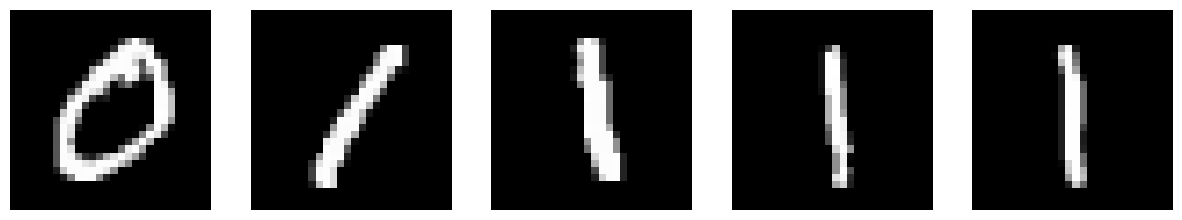

In [41]:
#выведем данные

fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range (5):
  ax[i].imshow(X_train[i], cmap='gray')
  ax[i].axis('off')

print(Y_train[:5])

In [42]:
#нормируем данные

X_train = X_train/255
X_test = X_test/255

In [43]:
#разобьем на категории

from keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

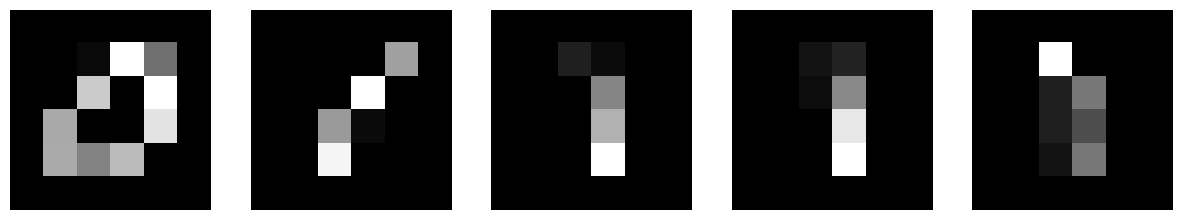

In [44]:
#уменьшим размер картинок

X_train = tf.image.resize(X_train[..., np.newaxis], (6, 6)) [..., 0]
X_test = tf.image.resize(X_test[..., np.newaxis], (6, 6)) [..., 0]

fig, ax = plt.subplots(1, 5, figsize=(15,10))

for i in range(5):
  ax[i].imshow(X_train[i], cmap = 'gray')
  ax[i].axis('off')

In [50]:
#Превращвем в вектор

X_train = X_train.numpy().flatten()
X_test = X_test.numpy().flatten()

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [49]:
X_train[0]

0.0